# Covid-19 Data Analysis
Our objective is to find a Correlation or Causation(if lucky) between the transmission of a disease(Covid-19) among countries' happiness index. Happiness index of a country is based on well being of people, economic conditions, infrastructure present in the country or even on the personality of the ruling party. 

## Import Libraries

In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import os
import pandas as pd 
import sys
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns
import math
import datetime as dt

Statistic functions and models

In [3]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Sklearn

In [4]:
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

## Import Data

In [38]:
corona = pd.read_csv("time_series_covid_19_confirmed.csv")
happy = pd.read_csv("World happiness Report 2019.csv")

In [39]:
corona.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55557,55575,55580,55604,55617,55646,55664,55680,55696,55707
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,96838,97909,99062,100246,101285,102306,103327,104313,105229,106215
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,111418,111600,111764,111917,112094,112279,112461,112622,112805,112960
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10610,10645,10672,10699,10712,10739,10775,10799,10822,10849
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20452,20478,20499,20519,20548,20584,20640,20695,20759,20782


In [40]:
# Dropping a couple of columns
corona.drop(["Lat","Long"], axis=1, inplace=True)

# Fillna in Province/State column with ""
corona["Province/State"].fillna("", inplace=True)

# Groupby the dataset with 
corona = corona.groupby("Country/Region").sum()

In [41]:
corona.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,55557,55575,55580,55604,55617,55646,55664,55680,55696,55707
Albania,0,0,0,0,0,0,0,0,0,0,...,96838,97909,99062,100246,101285,102306,103327,104313,105229,106215
Algeria,0,0,0,0,0,0,0,0,0,0,...,111418,111600,111764,111917,112094,112279,112461,112622,112805,112960
Andorra,0,0,0,0,0,0,0,0,0,0,...,10610,10645,10672,10699,10712,10739,10775,10799,10822,10849
Angola,0,0,0,0,0,0,0,0,0,0,...,20452,20478,20499,20519,20548,20584,20640,20695,20759,20782


In [42]:
Corona_max_infected_rate = pd.DataFrame(corona.diff(axis=1).max(axis=1), columns=["max_infected_rate"])
Corona_max_infected_rate

,max_infected_rate
Country/Region,
Afghanistan,1485.0
Albania,1239.0
Algeria,1133.0
Andorra,299.0
Angola,355.0
...,...
Vietnam,110.0
West Bank and Gaza,2516.0
Yemen,116.0


In [43]:
happy

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [44]:
happy = happy.set_index("Country or region")
Country_happiness_score = happy[["Score", "GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices"]]
Country_happiness_score

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,,
Finland,7.769,1.340,1.587,0.986,0.596
Denmark,7.600,1.383,1.573,0.996,0.592
Norway,7.554,1.488,1.582,1.028,0.603
Iceland,7.494,1.380,1.624,1.026,0.591
Netherlands,7.488,1.396,1.522,0.999,0.557
...,...,...,...,...,...
Rwanda,3.334,0.359,0.711,0.614,0.555
Tanzania,3.231,0.476,0.885,0.499,0.417
Afghanistan,3.203,0.350,0.517,0.361,0.000


In [45]:
Transmission_Happiness = Corona_max_infected_rate.join(Country_happiness_score, how="inner")

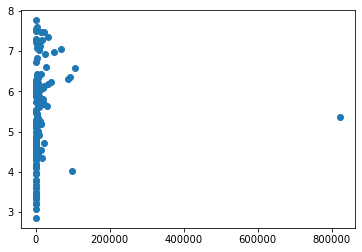

In [46]:
plt.scatter(Transmission_Happiness["max_infected_rate"],Transmission_Happiness["Score"])

In [ ]:
Transmission_Happiness.